Agent position: (15, 1)
Target position: (11, 14)
43
Target reached in generation 58
Genetic Algorithm Metrics:
    execution_time: 4.97602915763855
    final_path_length: 26
    starting_paths: 58
    final_paths: 32
    number_of_dublicate_best_paths: 26
    path_found: True
    generations_needed: 58
    manhattan_distance: 17


'\n\navg_metrics = run_multiple_evaluations(game_map, start, target, \n                                     population_size=1000, \n                                     generations=100, \n                                     mutation_rate=0.9, \n                                     max_steps=abs(target[0] - start[0]) + abs(target[1] - start[1]) * 3, \n                                     num_iterations=20)\n\nprint(f"Success rate: {avg_metrics[\'success_rate\']}%")\nif avg_metrics[\'successful_runs\'] > 0:\n    print(f"Average execution time: {avg_metrics[\'avg_execution_time\']:.2f} seconds")\n    print(f"Average path length: {avg_metrics[\'avg_final_path_length\']:.2f}")\n    print(f"Average generations needed: {avg_metrics[\'avg_generations_needed\']:.2f}")\nelse:\n    print("No successful runs were found.")\n    print("Try adjusting the parameters (population_size, generations, mutation_rate, max_steps)")\n\n'

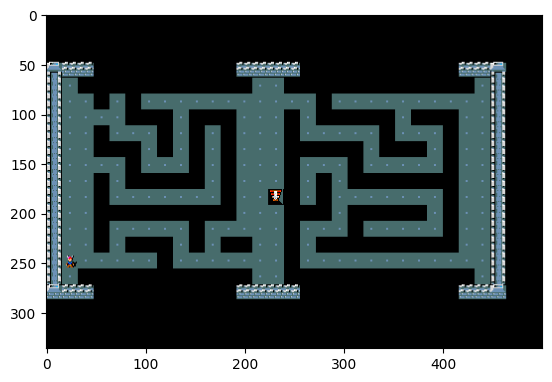

In [14]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

from utils import *
from genetic_new import *

#Create our environment specifying the Map and what keys we have to observe 
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel", "blstats", "message"))
SEED = 31
env.seed(SEED)
state = env.reset()

coordinates = [500, 500]

game_map = state['chars']
game = state['pixel']
game_stats = state['blstats']
game_mex = state['message']

plt.imshow(state['pixel'][:coordinates[0], :coordinates[1]])

#game_map = np.array(game_map)

start = get_player_location(game_map)
target = get_target_location(game_map)
hp = game_stats[6]
print("Agent position:", start)
print("Target position:", target)


# Add Game Over function
def display_game_over():
    plt.text(0.5, 0.5, "Game Over: You were killed by monsters!", 
             fontsize=20, ha='center', va='center', color='red', transform=plt.gca().transAxes)

# Add ictory function
def display_victory():
    plt.text(0.5, 0.5, "Victory: You reached the target!", 
             fontsize=20, ha='center', va='center', color='green', transform=plt.gca().transAxes)

population_size = 1000 #number of possible created path in our dictionary
generations = 100
mutation_rate = 0.9 #probability of mutation from one path to another
max_steps = abs(target[0] - start[0]) + abs(target[1] - start[1]) * 3
print(max_steps)
#list_paths = genetic_alg_func(game_map, start, target, population_size, generations, mutation_rate, max_steps)

# Compare genetic algorithm and RL
#'''
list_paths, genetic_metrics = evaluate_genetic_algorithm(game_map, start, target, population_size, generations, mutation_rate, max_steps)
print("Genetic Algorithm Metrics:")
for key, value in genetic_metrics.items():
    print(f"    {key}: {value}")

'''

avg_metrics = run_multiple_evaluations(game_map, start, target, 
                                     population_size=1000, 
                                     generations=100, 
                                     mutation_rate=0.9, 
                                     max_steps=abs(target[0] - start[0]) + abs(target[1] - start[1]) * 3, 
                                     num_iterations=20)

print(f"Success rate: {avg_metrics['success_rate']}%")
if avg_metrics['successful_runs'] > 0:
    print(f"Average execution time: {avg_metrics['avg_execution_time']:.2f} seconds")
    print(f"Average path length: {avg_metrics['avg_final_path_length']:.2f}")
    print(f"Average generations needed: {avg_metrics['avg_generations_needed']:.2f}")
else:
    print("No successful runs were found.")
    print("Try adjusting the parameters (population_size, generations, mutation_rate, max_steps)")

'''

In [15]:
for idx, path in enumerate(list_paths):
   print(f"Path {idx + 1}: {path}")

Path 1: [(15, 1), (15, 2), (14, 2), (13, 2), (12, 2), (11, 2)]
Path 2: [(15, 1), (14, 1), (14, 2), (13, 2), (12, 2), (11, 2)]
Path 3: [(15, 1), (15, 2), (14, 2), (13, 2), (12, 2), (11, 2), (11, 1)]
Path 4: [(15, 1), (15, 2), (15, 3), (15, 4), (14, 4), (13, 4)]
Path 5: [(15, 1), (14, 1), (13, 1), (12, 1), (11, 1), (10, 1)]
Path 6: [(15, 1), (15, 2), (14, 2), (14, 1), (13, 1), (12, 1), (11, 1), (10, 1), (10, 2), (11, 2)]
Path 7: [(15, 1), (15, 2), (14, 2), (13, 2), (12, 2), (11, 2), (10, 2)]
Path 8: [(15, 1), (16, 1), (15, 1), (14, 1), (14, 2), (15, 2), (15, 3), (15, 4), (14, 4), (13, 4), (13, 5), (13, 6), (13, 7), (13, 8), (14, 8)]
Path 9: [(15, 1), (16, 1), (15, 1), (14, 1), (14, 2), (15, 2), (15, 3), (15, 4), (14, 4), (13, 4), (13, 5)]
Path 10: [(15, 1), (14, 1), (14, 2), (15, 2), (15, 3), (15, 4), (15, 5), (15, 6)]
Path 11: [(15, 1), (14, 1), (14, 2), (15, 2), (15, 3), (15, 4), (14, 4), (13, 4), (13, 5)]
Path 12: [(15, 1), (16, 1), (15, 1), (14, 1), (14, 2), (15, 2), (15, 3), (15, 4)

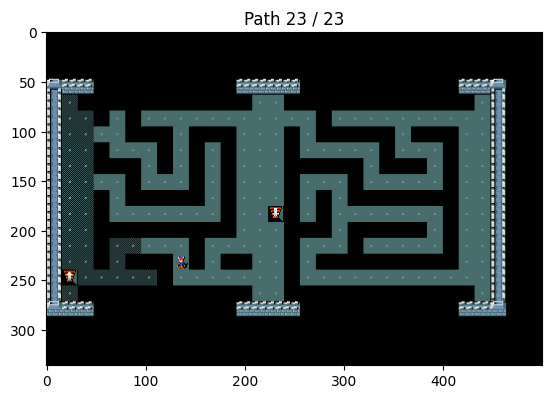

In [3]:
# Iterate over each path in list_paths
for idx, path in enumerate(list_paths):  # 'idx' will be the index (starting from 0)
    try:
        # Set the title to indicate the path number
        plt.title(f"Path {idx + 1} / {len(list_paths)}")  # Index starts from 0, so we add 1 to make it human-readable

        # Reset dell'ambiente per ogni nuovo percorso
        env.seed(SEED)
        state = env.reset()  # Reset dell'ambiente
        game_map = state['chars']
        game = state['pixel']
        game_stats = state['blstats']
        game_mex = state['message']
        
        # Posiziona il giocatore allo start ogni volta
        player_location = get_player_location(game_map)
        target_location = get_target_location(game_map)

        # Convert the path to actions (if necessary)
        actions = actions_from_path(start, path[1:])

        # Visualize the current path
        image = plt.imshow(game[:coordinates[0], :coordinates[1]])
        for action in actions:
            s, _, done, _ = env.step(action)  # `done` tells us if the simulation is over
            image.set_data(s['pixel'][:coordinates[0], :coordinates[1]])

            # If the simulation is over
            if done:
                # Check if the player is dead
                if hp == 0:
                    display_game_over()
                else:
                    display_victory()
                break  # Stop the simulation for the current path

            # Update the game visualization
            display.display(plt.gcf())
            display.clear_output(wait=True)
    except Exception as e:
        continue